## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df=pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## EDA

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

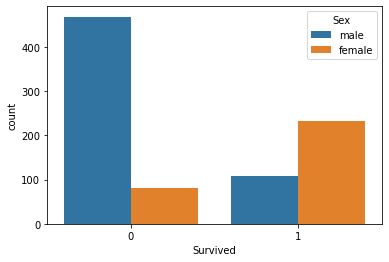

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [10]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

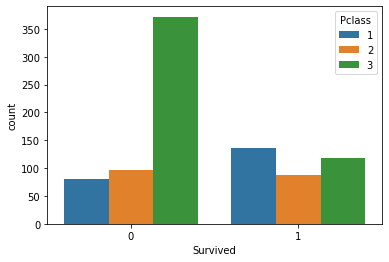

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [12]:
pd.crosstab(index=[df.Survived], columns=[df.Sex,df.Pclass])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

In [13]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Feature Engineering

In [14]:
df['Deck']=df["Cabin"].fillna('U0').str.slice(0,1)

In [15]:
df['Deck'].isnull().sum()

0

In [16]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df['Deck']=df['Deck'].map(deck)

In [17]:
df.drop('Cabin',axis=1,inplace=True)

In [18]:
df.drop('PassengerId', axis=1,inplace=True)

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.0


In [20]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [21]:
df1 = df[df['Pclass'] == 1]
df2 = df[df['Pclass'] == 2]
df3 = df[df['Pclass'] == 3]

In [22]:
df1['Age'] = df1['Age'].fillna(38.0)
df2['Age'] = df2['Age'].fillna(30.0)
df3['Age'] = df3['Age'].fillna(25.0)

C:\Users\sykum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [23]:
df = pd.concat((df1,df2,df3),ignore_index=True)

In [24]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        1
dtype: int64

In [26]:
df['Deck'].fillna(8,inplace=True)

In [27]:
df['Deck']=df["Deck"].astype(int)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [29]:
df["Sex"] = df['Sex'].map({'female':1 , 'male':0})

In [30]:
ports = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(ports)

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,3
1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,3
2,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0,5
3,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,0,3
4,1,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,0,1


In [32]:
df.drop(["Name",'Ticket'],axis=1,inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,1,1,38.0,1,0,71.2833,1,3
1,1,1,1,35.0,1,0,53.1000,0,3
2,0,1,0,54.0,0,0,51.8625,0,5
3,1,1,1,58.0,0,0,26.5500,0,3
4,1,1,0,28.0,0,0,35.5000,0,1


## Splitting the dataset into train and test data 

In [34]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)

In [37]:
xtest=scaler.transform(xtest)

## Using Classification Models for Prediction

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [39]:
ypred=model.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.7877094972067039
[[102  18]
 [ 20  39]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       120
           1       0.68      0.66      0.67        59

    accuracy                           0.79       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.79      0.79      0.79       179



In [41]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(xtrain,ytrain)

[20:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sykum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
ypred1=model1.predict(xtest)

In [43]:
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(classification_report(ytest,ypred1))

0.8100558659217877
[[101  19]
 [ 15  44]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       120
           1       0.70      0.75      0.72        59

    accuracy                           0.81       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [44]:
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
model2.fit(xtrain,ytrain)

Learning rate set to 0.00472
0:	total: 119ms	remaining: 3m 57s
1:	total: 121ms	remaining: 2m 1s
2:	total: 124ms	remaining: 1m 22s
3:	total: 125ms	remaining: 1m 2s
4:	total: 127ms	remaining: 50.6s
5:	total: 129ms	remaining: 42.8s
6:	total: 131ms	remaining: 37.4s
7:	total: 134ms	remaining: 33.4s
8:	total: 136ms	remaining: 30.2s
9:	total: 139ms	remaining: 27.6s
10:	total: 141ms	remaining: 25.4s
11:	total: 143ms	remaining: 23.7s
12:	total: 145ms	remaining: 22.2s
13:	total: 148ms	remaining: 21s
14:	total: 150ms	remaining: 19.9s
15:	total: 153ms	remaining: 18.9s
16:	total: 156ms	remaining: 18.2s
17:	total: 158ms	remaining: 17.4s
18:	total: 161ms	remaining: 16.8s
19:	total: 163ms	remaining: 16.1s
20:	total: 166ms	remaining: 15.7s
21:	total: 169ms	remaining: 15.2s
22:	total: 172ms	remaining: 14.8s
23:	total: 174ms	remaining: 14.3s
24:	total: 175ms	remaining: 13.8s
25:	total: 178ms	remaining: 13.5s
26:	total: 180ms	remaining: 13.2s
27:	total: 183ms	remaining: 12.9s
28:	total: 186ms	remaining: 1

277:	total: 796ms	remaining: 4.93s
278:	total: 799ms	remaining: 4.93s
279:	total: 801ms	remaining: 4.92s
280:	total: 803ms	remaining: 4.91s
281:	total: 806ms	remaining: 4.91s
282:	total: 808ms	remaining: 4.9s
283:	total: 811ms	remaining: 4.9s
284:	total: 814ms	remaining: 4.9s
285:	total: 816ms	remaining: 4.89s
286:	total: 819ms	remaining: 4.89s
287:	total: 823ms	remaining: 4.89s
288:	total: 824ms	remaining: 4.88s
289:	total: 827ms	remaining: 4.88s
290:	total: 829ms	remaining: 4.87s
291:	total: 832ms	remaining: 4.87s
292:	total: 833ms	remaining: 4.85s
293:	total: 836ms	remaining: 4.85s
294:	total: 838ms	remaining: 4.84s
295:	total: 841ms	remaining: 4.84s
296:	total: 843ms	remaining: 4.83s
297:	total: 845ms	remaining: 4.83s
298:	total: 848ms	remaining: 4.82s
299:	total: 850ms	remaining: 4.82s
300:	total: 852ms	remaining: 4.81s
301:	total: 855ms	remaining: 4.8s
302:	total: 857ms	remaining: 4.8s
303:	total: 859ms	remaining: 4.79s
304:	total: 862ms	remaining: 4.79s
305:	total: 864ms	remaini

551:	total: 1.43s	remaining: 3.74s
552:	total: 1.43s	remaining: 3.74s
553:	total: 1.43s	remaining: 3.74s
554:	total: 1.43s	remaining: 3.73s
555:	total: 1.44s	remaining: 3.73s
556:	total: 1.44s	remaining: 3.73s
557:	total: 1.44s	remaining: 3.72s
558:	total: 1.44s	remaining: 3.72s
559:	total: 1.45s	remaining: 3.72s
560:	total: 1.45s	remaining: 3.71s
561:	total: 1.45s	remaining: 3.71s
562:	total: 1.45s	remaining: 3.71s
563:	total: 1.45s	remaining: 3.7s
564:	total: 1.46s	remaining: 3.7s
565:	total: 1.46s	remaining: 3.7s
566:	total: 1.46s	remaining: 3.69s
567:	total: 1.46s	remaining: 3.69s
568:	total: 1.47s	remaining: 3.69s
569:	total: 1.47s	remaining: 3.69s
570:	total: 1.47s	remaining: 3.69s
571:	total: 1.48s	remaining: 3.68s
572:	total: 1.48s	remaining: 3.68s
573:	total: 1.48s	remaining: 3.68s
574:	total: 1.48s	remaining: 3.67s
575:	total: 1.48s	remaining: 3.67s
576:	total: 1.49s	remaining: 3.67s
577:	total: 1.49s	remaining: 3.66s
578:	total: 1.49s	remaining: 3.66s
579:	total: 1.49s	remai

836:	total: 2.07s	remaining: 2.87s
837:	total: 2.07s	remaining: 2.87s
838:	total: 2.07s	remaining: 2.87s
839:	total: 2.07s	remaining: 2.86s
840:	total: 2.08s	remaining: 2.86s
841:	total: 2.08s	remaining: 2.86s
842:	total: 2.08s	remaining: 2.85s
843:	total: 2.08s	remaining: 2.85s
844:	total: 2.08s	remaining: 2.85s
845:	total: 2.08s	remaining: 2.84s
846:	total: 2.09s	remaining: 2.84s
847:	total: 2.09s	remaining: 2.84s
848:	total: 2.09s	remaining: 2.84s
849:	total: 2.09s	remaining: 2.83s
850:	total: 2.1s	remaining: 2.83s
851:	total: 2.1s	remaining: 2.83s
852:	total: 2.1s	remaining: 2.82s
853:	total: 2.1s	remaining: 2.82s
854:	total: 2.1s	remaining: 2.82s
855:	total: 2.1s	remaining: 2.81s
856:	total: 2.11s	remaining: 2.81s
857:	total: 2.11s	remaining: 2.81s
858:	total: 2.11s	remaining: 2.8s
859:	total: 2.11s	remaining: 2.8s
860:	total: 2.11s	remaining: 2.8s
861:	total: 2.12s	remaining: 2.79s
862:	total: 2.12s	remaining: 2.79s
863:	total: 2.12s	remaining: 2.79s
864:	total: 2.12s	remaining: 

1096:	total: 2.57s	remaining: 2.12s
1097:	total: 2.57s	remaining: 2.11s
1098:	total: 2.57s	remaining: 2.11s
1099:	total: 2.58s	remaining: 2.11s
1100:	total: 2.58s	remaining: 2.1s
1101:	total: 2.58s	remaining: 2.1s
1102:	total: 2.58s	remaining: 2.1s
1103:	total: 2.58s	remaining: 2.1s
1104:	total: 2.59s	remaining: 2.1s
1105:	total: 2.59s	remaining: 2.09s
1106:	total: 2.59s	remaining: 2.09s
1107:	total: 2.59s	remaining: 2.09s
1108:	total: 2.59s	remaining: 2.08s
1109:	total: 2.6s	remaining: 2.08s
1110:	total: 2.6s	remaining: 2.08s
1111:	total: 2.6s	remaining: 2.08s
1112:	total: 2.6s	remaining: 2.07s
1113:	total: 2.6s	remaining: 2.07s
1114:	total: 2.6s	remaining: 2.07s
1115:	total: 2.61s	remaining: 2.06s
1116:	total: 2.61s	remaining: 2.06s
1117:	total: 2.61s	remaining: 2.06s
1118:	total: 2.61s	remaining: 2.06s
1119:	total: 2.62s	remaining: 2.06s
1120:	total: 2.62s	remaining: 2.05s
1121:	total: 2.62s	remaining: 2.05s
1122:	total: 2.62s	remaining: 2.05s
1123:	total: 2.62s	remaining: 2.04s
112

1341:	total: 3.06s	remaining: 1.5s
1342:	total: 3.07s	remaining: 1.5s
1343:	total: 3.07s	remaining: 1.5s
1344:	total: 3.07s	remaining: 1.5s
1345:	total: 3.07s	remaining: 1.49s
1346:	total: 3.08s	remaining: 1.49s
1347:	total: 3.08s	remaining: 1.49s
1348:	total: 3.08s	remaining: 1.49s
1349:	total: 3.08s	remaining: 1.48s
1350:	total: 3.08s	remaining: 1.48s
1351:	total: 3.09s	remaining: 1.48s
1352:	total: 3.09s	remaining: 1.48s
1353:	total: 3.09s	remaining: 1.47s
1354:	total: 3.09s	remaining: 1.47s
1355:	total: 3.09s	remaining: 1.47s
1356:	total: 3.1s	remaining: 1.47s
1357:	total: 3.1s	remaining: 1.46s
1358:	total: 3.1s	remaining: 1.46s
1359:	total: 3.1s	remaining: 1.46s
1360:	total: 3.1s	remaining: 1.46s
1361:	total: 3.11s	remaining: 1.46s
1362:	total: 3.11s	remaining: 1.45s
1363:	total: 3.11s	remaining: 1.45s
1364:	total: 3.11s	remaining: 1.45s
1365:	total: 3.11s	remaining: 1.45s
1366:	total: 3.12s	remaining: 1.44s
1367:	total: 3.12s	remaining: 1.44s
1368:	total: 3.12s	remaining: 1.44s
1

1585:	total: 3.56s	remaining: 929ms
1586:	total: 3.56s	remaining: 927ms
1587:	total: 3.56s	remaining: 924ms
1588:	total: 3.56s	remaining: 922ms
1589:	total: 3.57s	remaining: 920ms
1590:	total: 3.57s	remaining: 917ms
1591:	total: 3.57s	remaining: 915ms
1592:	total: 3.57s	remaining: 913ms
1593:	total: 3.58s	remaining: 911ms
1594:	total: 3.58s	remaining: 908ms
1595:	total: 3.58s	remaining: 906ms
1596:	total: 3.58s	remaining: 904ms
1597:	total: 3.58s	remaining: 902ms
1598:	total: 3.59s	remaining: 899ms
1599:	total: 3.59s	remaining: 897ms
1600:	total: 3.59s	remaining: 895ms
1601:	total: 3.59s	remaining: 892ms
1602:	total: 3.59s	remaining: 890ms
1603:	total: 3.6s	remaining: 888ms
1604:	total: 3.6s	remaining: 886ms
1605:	total: 3.6s	remaining: 883ms
1606:	total: 3.6s	remaining: 881ms
1607:	total: 3.6s	remaining: 879ms
1608:	total: 3.61s	remaining: 876ms
1609:	total: 3.61s	remaining: 874ms
1610:	total: 3.61s	remaining: 872ms
1611:	total: 3.61s	remaining: 870ms
1612:	total: 3.61s	remaining: 867

1826:	total: 4.05s	remaining: 384ms
1827:	total: 4.05s	remaining: 381ms
1828:	total: 4.05s	remaining: 379ms
1829:	total: 4.06s	remaining: 377ms
1830:	total: 4.06s	remaining: 375ms
1831:	total: 4.06s	remaining: 372ms
1832:	total: 4.06s	remaining: 370ms
1833:	total: 4.06s	remaining: 368ms
1834:	total: 4.07s	remaining: 366ms
1835:	total: 4.07s	remaining: 363ms
1836:	total: 4.07s	remaining: 361ms
1837:	total: 4.07s	remaining: 359ms
1838:	total: 4.08s	remaining: 357ms
1839:	total: 4.08s	remaining: 355ms
1840:	total: 4.08s	remaining: 352ms
1841:	total: 4.08s	remaining: 350ms
1842:	total: 4.08s	remaining: 348ms
1843:	total: 4.08s	remaining: 346ms
1844:	total: 4.09s	remaining: 343ms
1845:	total: 4.09s	remaining: 341ms
1846:	total: 4.09s	remaining: 339ms
1847:	total: 4.09s	remaining: 337ms
1848:	total: 4.09s	remaining: 334ms
1849:	total: 4.1s	remaining: 332ms
1850:	total: 4.1s	remaining: 330ms
1851:	total: 4.1s	remaining: 328ms
1852:	total: 4.1s	remaining: 325ms
1853:	total: 4.1s	remaining: 323

In [45]:
print(accuracy_score(ytest,model2.predict(xtest)))
print(confusion_matrix(ytest,model2.predict(xtest)))
print(classification_report(ytest,model2.predict(xtest)))

0.8212290502793296
[[105  15]
 [ 17  42]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       120
           1       0.74      0.71      0.72        59

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

